<div> <h1> <span style="color:brown"> Please give an upvote if you liked the notebook🙌</span></h1></div>

``` 
This notebook uses data from 2 csv files to plot the data visualizations:
                                          1. "2012_US_elect_county.csv"
                                          2. "us-2016-primary-results.csv.

```
                                                

# US Elections!!

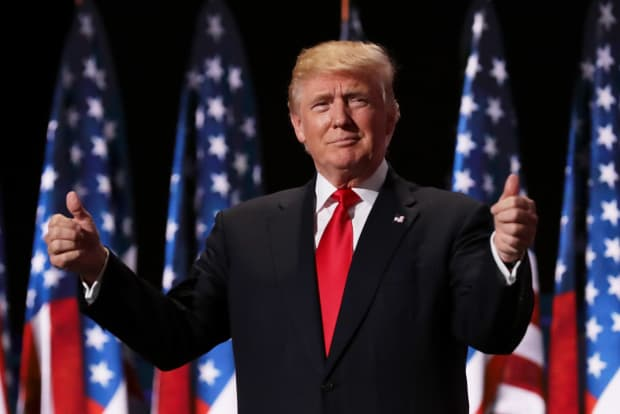

<a id="top"></a>

<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">Menu</h3>

  
<font color="blue" size=+1><b>Part 1</b></font>
* [1. Double bar Graph-1](#1)
* [2. Double bar Graph-2](#2)
* [3. Simple Line Plot](#3)
* [4. Corrcoef Plot](#4)
* [5. Pairplot](#5)

<font color="red" size=+1><b>Part 2</b></font>
* [6. USA basemap](#6)
* [7. R and D bar plot](#7)
* [8. Piechart](#8)
* [9. Stacked_Plot](#9) 
* [10. Corrcoefplot](#10)

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
pip install opencage

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import re 
import warnings
warnings.warn('ignore')

from opencage.geocoder import OpenCageGeocode
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import math 
key = '2117b047581540e59c772059f03a714a'
geocoder = OpenCageGeocode(key)
from matplotlib import style 

In [ ]:
df1= pd.read_csv('../input/us-elections-dataset/2012_US_elect_county.csv')
df2 = pd.read_csv('../input/us-elections-dataset/us-2016-primary-results.csv',sep=';')

<div> 
    <h1>
        <span style="color:Blue">Part 1</span>
    </h1>
</div>

<div><h3>
    <span style="font-family:cursive">This DataFrame consists of data of previous elections,and the data of the candidates Obama and Romney .</span>
    </h3>
    </div>
    

In [ ]:
def to_numbers(df):
    for i in range(len(df)):
        df['Obama vote'][i] = re.sub(',','',df['Obama vote'][i])
        df['Romney vote'][i] = re.sub(',','',df['Romney vote'][i])
    df['Obama vote'] = df['Obama vote'].astype(int).copy()
    df['Romney vote'] = df['Romney vote'].astype(int).copy()
    df.replace('#DIV/0!',0.0,inplace=True)
    df['%.1']= df["%.1"].astype(float).copy()
    df['%'] = df['%'].astype(float).copy()
    
to_numbers(df1)   

<a id="1"></a>
<font color="gray" size=+1.0><b>1. Double bar Graph-1</b></font>

<a href="#top" class="btn btn-primary btn-sm"  aria-pressed="true" style="color:white" data-toggle="popover" title="go to Colors">Go to menu</a>

In [ ]:
#obama top votes in counties vs romney 

def plot_bar():
    indexes1= df1['Obama vote'].sort_values(ascending=False).index[:5]
    new_df= df1.iloc[indexes1].copy()

    x = np.arange(5)
    y= np.arange(0,8000000,2000000)
    fig = plt.figure()
    ax =  fig.add_axes([0,0,1,1])
    ax.bar(x + 0.00,new_df['Obama vote'],color='b',width=0.25)
    ax.bar(x+0.25,new_df['Romney vote'],color='r',width=0.25)
    plt.xticks(x,new_df['County Name'].values,rotation=45,fontsize=20)
    plt.yticks(y,np.arange(0,8000000,2000000))
    plt.xlabel('County Name',fontsize=20)
    plt.legend(['Obama','Romney'])
    plt.ylabel('Votes',fontsize=20)
plot_bar()   

<a id="2"></a>
<font color="gray" size=+1.0><b>2. Double bar Graph-2</b></font>

<a href="#top" class="btn btn-primary btn-sm"  aria-pressed="true" style="color:white" data-toggle="popover" title="go to Colors">Go to menu</a>

In [ ]:
# romney top  votes counties against obama
def plot_bar1():
    indexes1= df1['Romney vote'].sort_values(ascending=False).index[:5]
    new_df= df1.iloc[indexes1].copy()

    x = np.arange(5)
    y= np.arange(0,8000000,2000000)
    fig = plt.figure()
    ax =  fig.add_axes([0,0,1,1])
    ax.bar(x + 0.00,new_df['Romney vote'],color='r',width=0.25)
    ax.bar(x+0.25,new_df['Obama vote'],color='b',width=0.25)
    plt.xticks(x,new_df['County Name'].values,rotation=45,fontsize=20)
    plt.yticks(y,np.arange(0,8000000,2000000))
    plt.legend(['Romney',"Obama"])
    plt.xlabel('County Name',fontsize=20)
    plt.ylabel('Votes',fontsize=20)
plot_bar1() 

<a id="3"></a>
<font color="gray" size=+1.0><b>3. Simple_line_Plot</b></font>

<a href="#top" class="btn btn-primary btn-sm"  aria-pressed="true" style="color:white" data-toggle="popover" title="go to Colors">Go to menu</a>

In [ ]:
def state_postal_plots(df1):
    index = df1['State Postal'].unique()
    x = [x for x in range(len(index))]
    y1  = df1.groupby(['State Postal']).mean()['Obama vote']
    y2 = df1.groupby(['State Postal']).mean()['Romney vote']
    plt.figure(figsize=(14,5))
    plt.plot(x,y1,color='red')
    plt.xticks(x,index,rotation=90)
    plt.plot(x,y2,color='blue')
    plt.ylabel('Votes Across Counties[mean]',fontsize=20)
    plt.legend(['Obama','Romney'])
    plt.xlabel('County',fontsize=20)
    plt.show()
state_postal_plots(df1)    

<a id="4"></a>
<font color="gray" size=+1.0><b>4. corrcoef_plot</b></font>

<a href="#top" class="btn btn-primary btn-sm"  aria-pressed="true" style="color:white" data-toggle="popover" title="go to Colors">Go to menu</a>

In [ ]:
def corrcoef(df1):
    cols  =['FIPS',"Obama vote",'Romney vote']
    sns.set(font_scale=1.5)
    cm = np.corrcoef(df1[cols].values.T)
    hm = sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',
                     annot_kws={'size':15},yticklabels=cols,xticklabels=cols)
    plt.show()
corrcoef(df1)

<a id="5"></a>
<font color="gray" size=+1.0><b>5. Pair_Plots</b></font>

<a href="#top" class="btn btn-primary btn-sm"  aria-pressed="true" style="color:white" data-toggle="popover" title="go to Colors">Go to menu</a>

In [ ]:
def pair_plots(df1):
    cols  =['FIPS',"Obama vote",'Romney vote','%','%.1']
    sns.pairplot(df1[cols],height=2.5)
    plt.tight_layout()
    plt.show()    
pair_plots(df1)

<div>
    <h1><span style='color:Red'>Part 2</span></h1></div>

<div><h3>
    <span style="font-family:cursive">This DataFrame consists of data of all the candidates from Republican and Democratic party .</span>
    </h3>
    </div>

<a id="6"></a>
<font color="gray" size=+1.0><b>6. USA basemap</b></font>

<a href="#top" class="btn btn-primary btn-sm"  aria-pressed="true" style="color:white" data-toggle="popover" title="go to Colors">Go to menu</a>

In [ ]:
def mapTut():
    plt.figure(figsize=(12,11))
    m = Basemap(projection='mill',llcrnrlat=20,urcrnrlat=50,\
                llcrnrlon=-130,urcrnrlon=-60,resolution='c')
    m.drawcoastlines()
    m.drawcountries()
    m.drawstates()
    m.fillcontinents(color='white',lake_color='white')
    m.drawmapboundary(fill_color='#FFFFFF')

    lat =[]
    lng =[]
    for i in range(len(df2['state'].unique())):
        query =df2['state'].value_counts().index[i]
        results = geocoder.geocode(query)
        lat = results[0]['geometry']['lat']
        lng = results[0]['geometry']['lng']
        xpt,ypt = m(lng,lat)
        m.plot(xpt,ypt,'o','red',markersize=(28-i)*2)
        
    plt.title("State Count")
    plt.show()


mapTut()

<a id="7"></a>
<font color="gray" size=+1.0><b>7. Bar_chart</b></font>

<a href="#top" class="btn btn-primary btn-sm"  aria-pressed="true" style="color:white" data-toggle="popover" title="go to Colors">Go to menu</a>

In [ ]:
def bar_chart(df2):
    x=[1,2]
    plt.figure(figsize=(6,5))
    y1 = df2['party'].value_counts()[0]
    y2= df2['party'].value_counts()[1]
    plt.xticks(x,['Republican','Democratic'])
    plt.bar(1,y1,color='red')
    plt.bar(2,y2,color='blue')
    plt.title('Distribution of Rep and Dem')
    plt.show()
bar_chart(df2)

<a id="8"></a>
<font color="gray" size=+1.0><b>8. Pie_Chart</b></font>

<a href="#top" class="btn btn-primary btn-sm"  aria-pressed="true" style="color:white" data-toggle="popover" title="go to Colors">Go to menu</a>

In [ ]:
# candidate distribution in nost states 
def pie_candid(df2):
    style.use('fivethirtyeight')
    plt.pie(df2['candidate'].value_counts()[:5],
           labels=df2['candidate'].value_counts().index[:5])
    plt.axis('equal')
    plt.show()
pie_candid(df2)

<a id="9"></a>
<font color="gray" size=+1.0><b>9. Stacked_Plot</b></font>

<a href="#top" class="btn btn-primary btn-sm"  aria-pressed="true" style="color:white" data-toggle="popover" title="go to Colors">Go to menu</a>


In [ ]:
def stacked_plots(df2):
    style.use('fivethirtyeight')
    new_df  = df2.groupby(['candidate']).sum().copy()
    fig,axes = plt.subplots(3,figsize=(12,6))
    labels = new_df.index
    x = [ x for x in range(len(labels))]
    axes[0].plot(x,new_df.iloc[:,0])
    axes[0].set_ylabel('FIPS',fontsize=20)
    axes[1].plot(x,new_df.iloc[:,1])
    axes[1].set_ylabel('Votes',fontsize=20)
    axes[2].plot(x,new_df.iloc[:,2])
    axes[2].set_ylabel('Fraction votes',fontsize=20)
    plt.xticks(x,new_df.index,rotation=90)
stacked_plots(df2)

<a id="10"></a>
<font color="gray" size=+1.0><b>10. CorrCoefPlot</b></font>

<a href="#top" class="btn btn-primary btn-sm"  aria-pressed="true" style="color:white" data-toggle="popover" title="go to Colors">Go to menu</a>

In [ ]:
def correllogram(df2):
    cols =['fips','votes','fraction_votes']
    sns.heatmap(df2[cols].corr(),
               xticklabels=df2[cols].corr().columns,
               yticklabels=df2[cols].corr().columns,cmap='RdYlGn',
               center=0,annot=True)
    plt.title('correlation plot of DataFrame2')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()
correllogram(df2)

# Thank You!!!